## Bag of words

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame({"text":["My name is Bala",
                           "Bala likes Grapes",
                           "Bala like chocko",
                           "How are you ?"],"output":[1,1,0,0]})

df.head()

,text,output
0,My name is Bala,1
1,Bala likes Grapes,1
2,Bala like chocko,0
3,How are you ?,0


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

bow = cv.fit_transform(df['text'])
bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 13 stored elements and shape (4, 11)>

In [9]:
# Vocabulary
vocabulary = cv.vocabulary_
sorted_vocabulary = dict(sorted(vocabulary.items(), key=lambda item: item[1]))
print(sorted_vocabulary)

{'are': 0, 'bala': 1, 'chocko': 2, 'grapes': 3, 'how': 4, 'is': 5, 'like': 6, 'likes': 7, 'my': 8, 'name': 9, 'you': 10}


In [11]:
bow[0]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (1, 11)>

In [10]:
bow.toarray()

array([[0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]])

In [14]:
cv.transform(["My favourite is Grapes"]).toarray()          #Out of Vocabulary Issue

array([[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0]])

In [15]:
X= bow.toarray()
y = df["output"]

## N Grams

In [19]:
df = pd.DataFrame({"text":["My name is Bala",
                           "Bala likes Grapes",
                           "Bala like chocko",
                           "How are you ?"],"output":[1,1,0,0]})

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))

bow = cv.fit_transform(df['text'])
vocabulary = cv.vocabulary_
sorted_vocabulary = dict(sorted(vocabulary.items(), key=lambda item: item[1]))
print(sorted_vocabulary)
bow.toarray()

{'are you': 0, 'bala like': 1, 'bala likes': 2, 'how are': 3, 'is bala': 4, 'like chocko': 5, 'likes grapes': 6, 'my name': 7, 'name is': 8}


array([[0, 0, 0, 0, 1, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0]])

### TFIDF - Term Frequency - Inverse Document Frequency

In [21]:
df = pd.DataFrame({"text":["My name is Bala",
                           "Bala likes Grapes",
                           "Bala like chocko",
                           "How are you ?"],"output":[1,1,0,0]})

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

tfidf_vector = tfidf.fit_transform(df['text'])
tfidf_vector.toarray()

array([[0.        , 0.34578314, 0.        , 0.        , 0.        ,
        0.5417361 , 0.        , 0.        , 0.5417361 , 0.5417361 ,
        0.        ],
       [0.        , 0.41137791, 0.        , 0.64450299, 0.        ,
        0.        , 0.        , 0.64450299, 0.        , 0.        ,
        0.        ],
       [0.        , 0.41137791, 0.64450299, 0.        , 0.        ,
        0.        , 0.64450299, 0.        , 0.        , 0.        ,
        0.        ],
       [0.57735027, 0.        , 0.        , 0.        , 0.57735027,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.57735027]])

## Word2vec

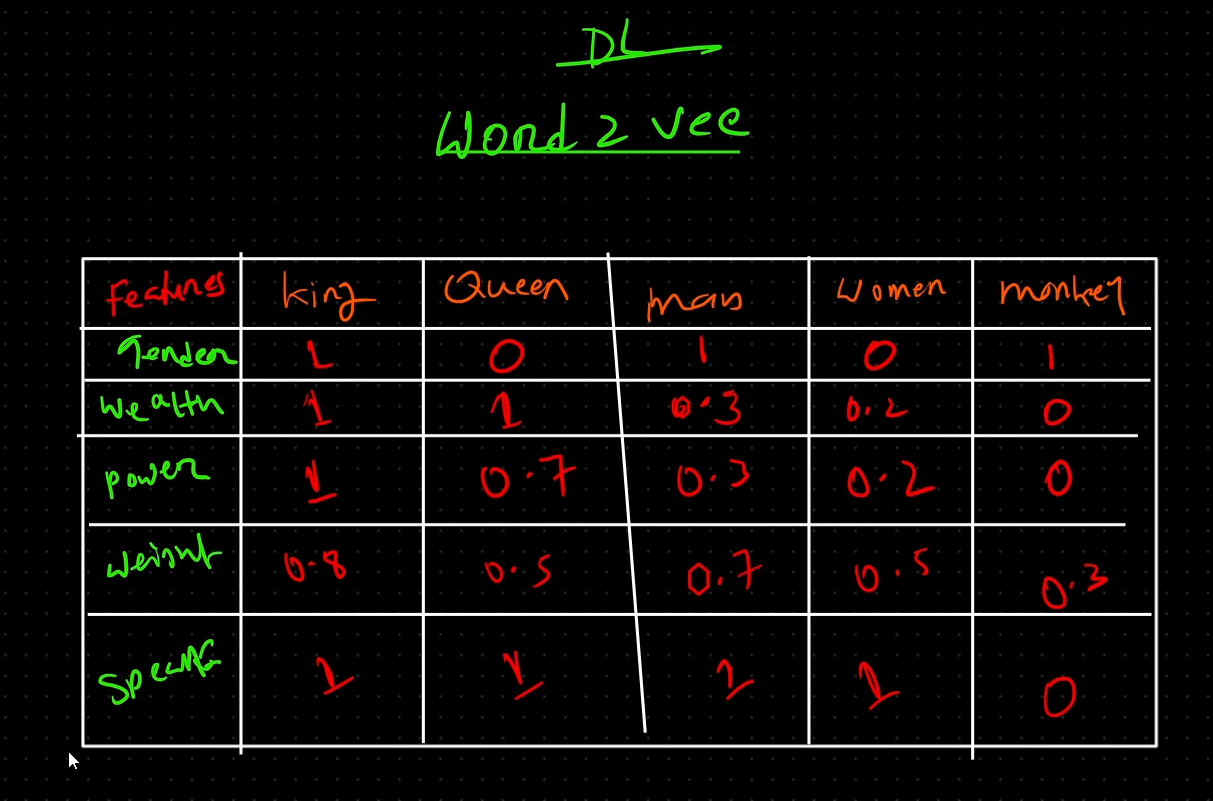

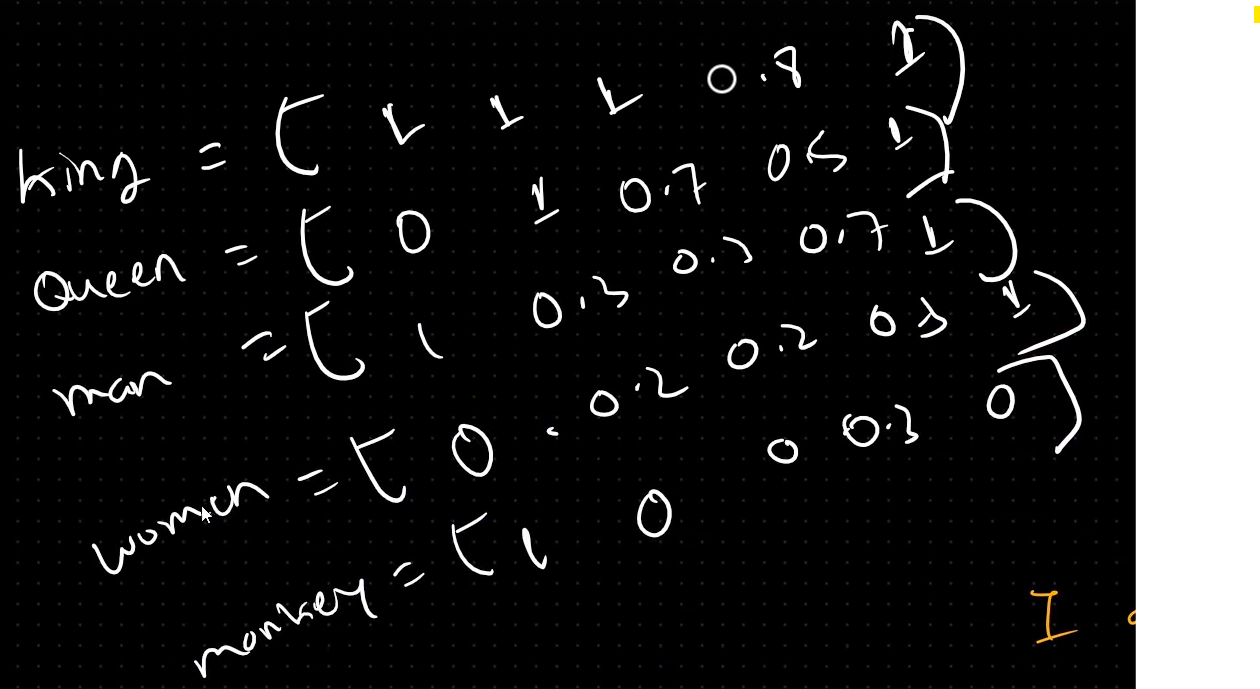